<a href="https://colab.research.google.com/github/0zeynep/mobile_device_price_prediction/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mobiles=pd.read_csv("mobiles_dataset.csv",encoding='latin-1')
mobiles.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


**Fiyat Temizleme**

In [2]:
import re
def clean_price_fixed_FINAL(x):
    if pd.isna(x):
        return np.nan
    x = str(x)
    x = re.sub(r"[A-Za-z\s]+", "", x)
    x = x.replace(",", "")
    if not x or x == '-':
        return np.nan
    try:
        return float(x)
    except ValueError:
        return np.nan
price_columns = [col for col in mobiles.columns if "Price" in col]
for col in price_columns:
    mobiles[col] = mobiles[col].apply(clean_price_fixed_FINAL)
threshold=5000
mobiles = mobiles[mobiles['Launched Price (USA)'] < threshold].copy()


**Bağımsız Değişkenleri Temizleme**

In [3]:
mobiles["RAM"]=mobiles["RAM"].astype(str).str.extract(r'(\d+\.?\d*)',expand=False)
mobiles["RAM"]=pd.to_numeric(mobiles["RAM"],errors="coerce")
mobiles["Front Camera"] = mobiles["Front Camera"].astype(str).str.extract(r"(\d+\.?\d*)", expand=False)
mobiles["Front Camera"] = pd.to_numeric(mobiles["Front Camera"],errors='coerce')
mobiles["Back Camera"]=mobiles['Back Camera'].astype(str).str.extract(r'(\d+\.?\d*)',expand=False)
mobiles['Back Camera']=pd.to_numeric(mobiles['Back Camera'],errors='coerce')
mobiles['Mobile Weight']=mobiles['Mobile Weight'].astype(str).str.extract(r'(\d+\.?\d*)',expand=False)
mobiles['Mobile Weight']=pd.to_numeric(mobiles['Mobile Weight'],errors='coerce')
mobiles['Battery Capacity']=mobiles['Battery Capacity'].astype(str).str.extract(r'(\d+\.?\d*)',expand=False)
mobiles['Battery Capacity']=pd.to_numeric(mobiles['Battery Capacity'],errors='coerce')
mobiles['Screen Size']=mobiles['Screen Size'].astype(str).str.extract(r'(\d+\.?\d*)',expand=False)
mobiles['Screen Size']=pd.to_numeric(mobiles['Screen Size'],errors='coerce')

**Hedef Belirleme**

In [4]:
target="Launched Price (USA)"
y=mobiles[target]
features=["RAM","Launched Year","Front Camera","Back Camera","Mobile Weight","Battery Capacity","Screen Size"]
X_raw=mobiles[features]
combined_mobiles = pd.concat([X_raw, y], axis=1).dropna()
X=combined_mobiles[features]
y=combined_mobiles[target]

**Korelasyon Matrisi**

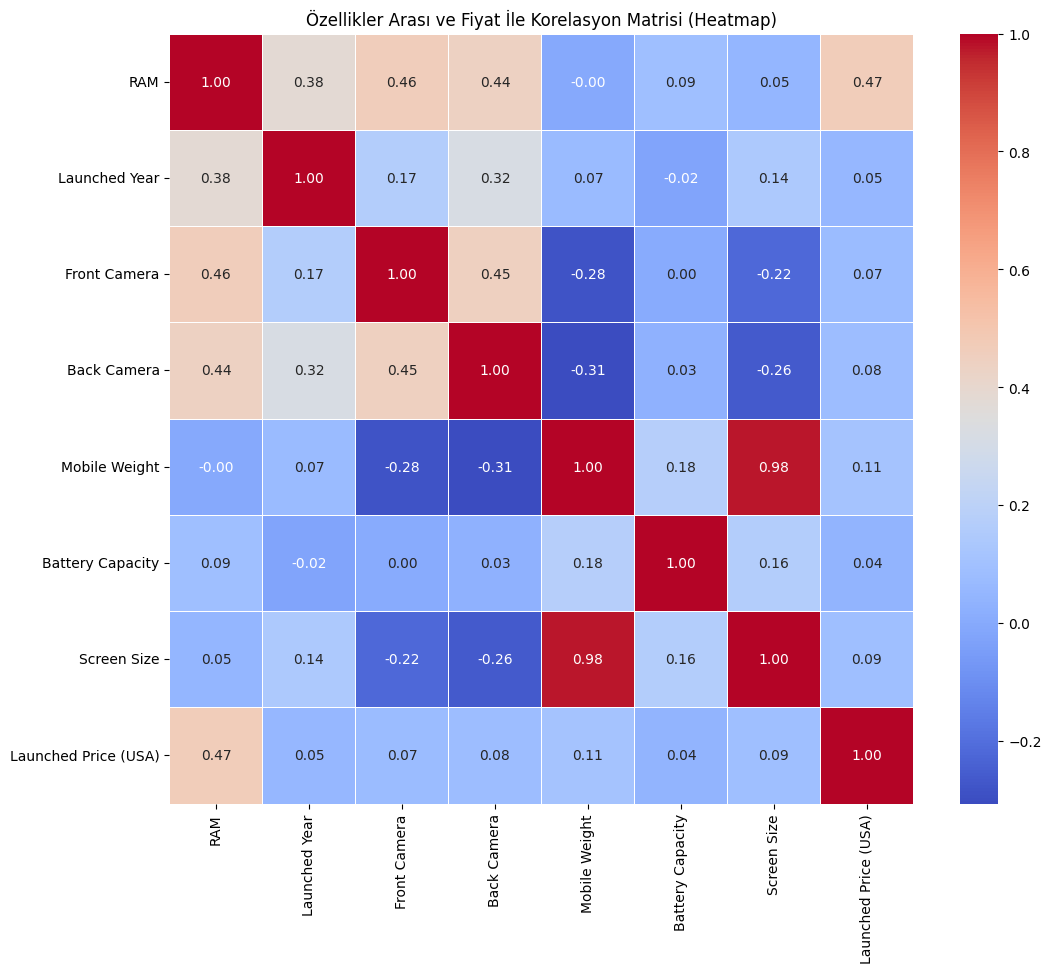

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
correlation_data = mobiles[features + [target]].copy()
correlation_data = correlation_data.dropna()
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5,
    cbar=True
)
plt.title('Özellikler Arası ve Fiyat İle Korelasyon Matrisi (Heatmap)')
plt.show()

**Bar Grafiği**

<Axes: xlabel='RAM'>

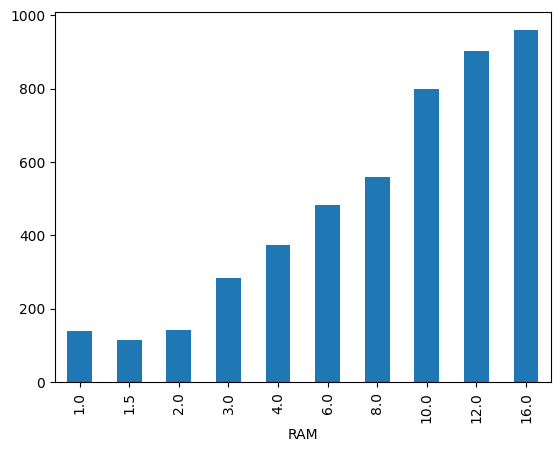

In [ ]:
mobiles.groupby("RAM")["Launched Price (USA)"].mean().plot(kind="bar")

**Linear Regresyon**

RMSE (Ortalama Hata): 388.94
R2 Score (Açıklayıcılık): 0.18


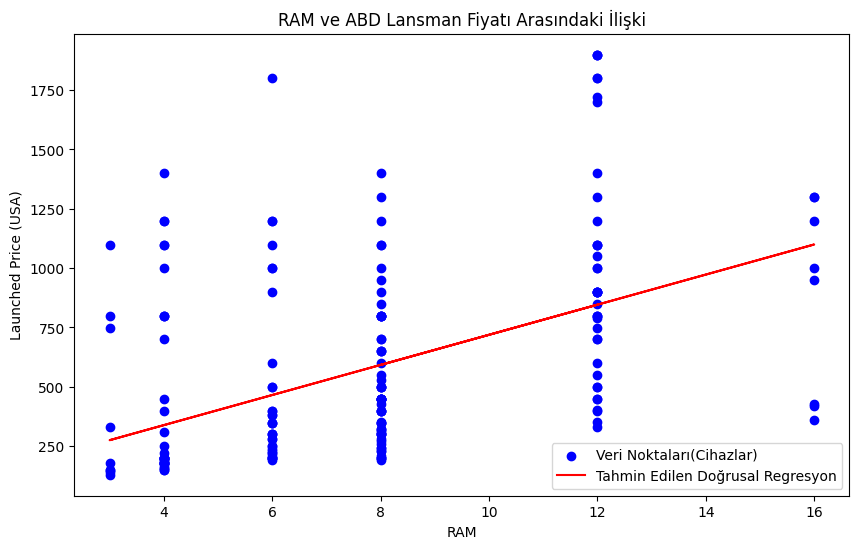

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress
target = "Launched Price (USA)"
feature = "RAM"
ram_price_df = mobiles[[feature, target]].copy()
clean_subset = ram_price_df.dropna()
X = clean_subset[feature].to_numpy().reshape(-1, 1)
y = clean_subset[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_score_test = lin_reg.score(X_test, y_test)
print(f"RMSE (Ortalama Hata): {rmse:.2f}")
print(f"R2 Score (Açıklayıcılık): {r2_score_test:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Veri Noktaları(Cihazlar)')
plt.plot(X_test, y_pred, color='red', label='Tahmin Edilen Doğrusal Regresyon')
plt.title('RAM ve ABD Lansman Fiyatı Arasındaki İlişki')
plt.xlabel('RAM')
plt.ylabel('Launched Price (USA)')
plt.legend()
plt.show()

**Polinomal Regresyon**

RMSE: 389.2949020768064
R2 Score: 0.17706984104122248


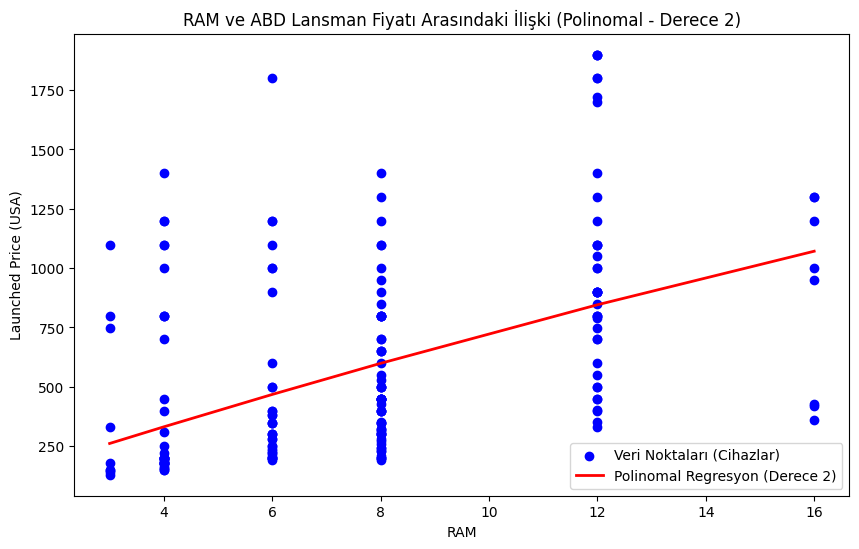

In [18]:

from sklearn.preprocessing import PolynomialFeatures
ram_price_df = mobiles[[feature, target]].copy()
clean_subset = ram_price_df.dropna()
X = clean_subset[feature].to_numpy().reshape(-1, 1)
y = clean_subset[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_score_test = r2_score(y_test, y_pred) # r2_score fonksiyonu kullanıldı
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2_score_test}")
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Veri Noktaları (Cihazlar)')
sorted_zip = sorted(zip(X_test, y_pred))
X_test_sorted, y_pred_sorted = zip(*sorted_zip)
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label=f'Polinomal Regresyon (Derece {degree})')
plt.title(f'RAM ve ABD Lansman Fiyatı Arasındaki İlişki (Polinomal - Derece {degree})')
plt.xlabel('RAM')
plt.ylabel('Launched Price (USA)')
plt.legend()
plt.show()

**Random Forest**

--- Random Forest Sonuçları ---
RMSE (Ortalama Hata): 383.71
R2 Score (Başarı Oranı): 0.2005


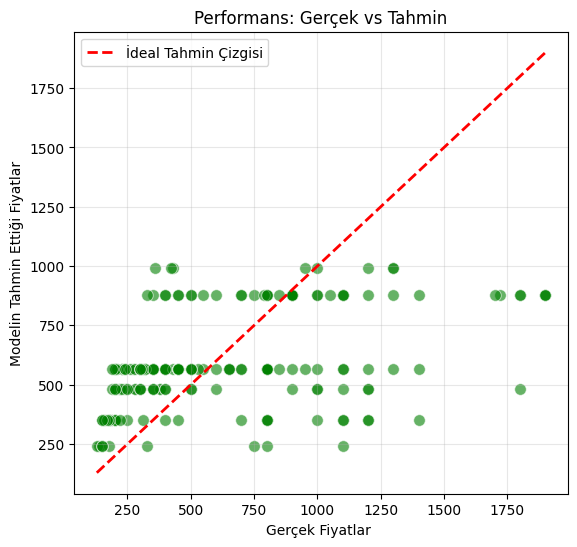

In [19]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
target = "Launched Price (USA)"
features = ["RAM"]
subset = mobiles[features + [target]].copy()
clean_subset = subset.dropna()
X = clean_subset[features]
y = clean_subset[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"--- Random Forest Sonuçları ---")
print(f"RMSE (Ortalama Hata): {rmse:.2f}")
print(f"R2 Score (Başarı Oranı): {r2:.4f}")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6, s=70)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='İdeal Tahmin Çizgisi')
plt.title('Performans: Gerçek vs Tahmin')
plt.xlabel('Gerçek Fiyatlar ')
plt.ylabel('Modelin Tahmin Ettiği Fiyatlar')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**SVR**

--- SVR (Support Vector Regression) Sonuçları ---
RMSE (Ortalama Hata): 394.08
R2 Score (Başarı Oranı): 0.1567


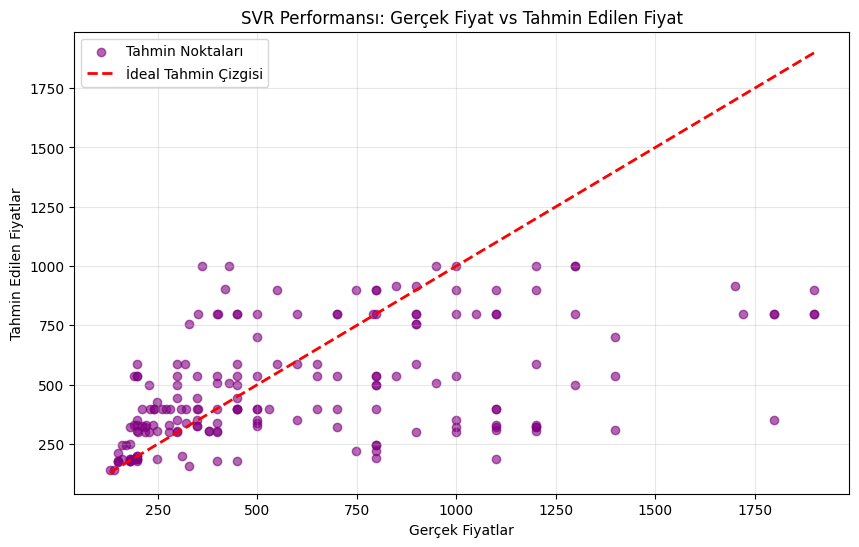

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
target = "Launched Price (USA)"
features = ["RAM", "Launched Year"]
subset = mobiles[features + [target]].copy()
clean_subset = subset.dropna()
X = clean_subset[features]
y = clean_subset[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

svr_model = SVR(kernel='rbf', C=1000, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"--- SVR (Support Vector Regression) Sonuçları ---")
print(f"RMSE (Ortalama Hata): {rmse:.2f}")
print(f"R2 Score (Başarı Oranı): {r2:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='Tahmin Noktaları')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='İdeal Tahmin Çizgisi')

plt.title('SVR Performansı: Gerçek Fiyat vs Tahmin Edilen Fiyat')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Çoklu Linear  Regresyon**

Model Performansı:
RMSE (Ortalama Hata): 387.31
R2 Score (Açıklayıcılık): 0.1854


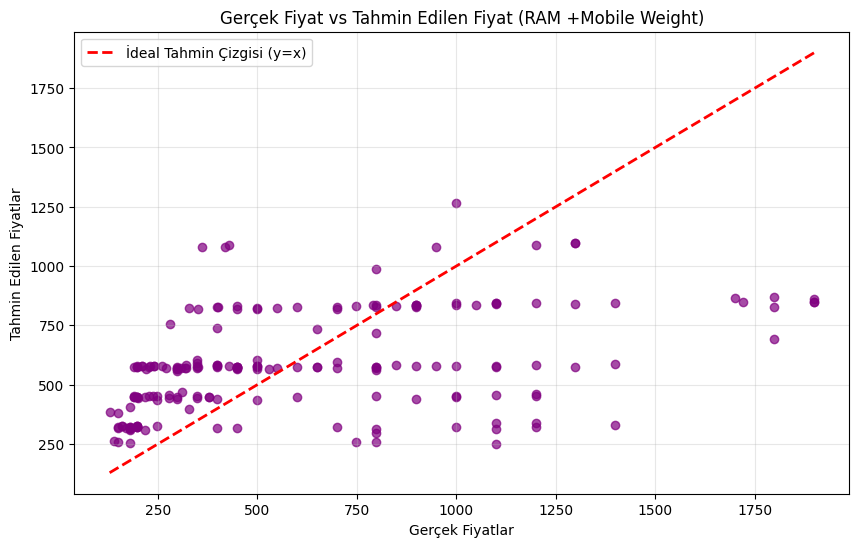

In [21]:
target = "Launched Price (USA)"
features = ["RAM", "Mobile Weight"]
subset = mobiles[features + [target]].copy()
clean_subset = subset.dropna()
X = clean_subset[features]
y = clean_subset[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred = multi_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Model Performansı:")
print(f"RMSE (Ortalama Hata): {rmse:.2f}")
print(f"R2 Score (Açıklayıcılık): {r2:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'r--',
    linewidth=2,
    label='İdeal Tahmin Çizgisi (y=x)'
)

plt.title('Gerçek Fiyat vs Tahmin Edilen Fiyat (RAM +Mobile Weight)')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmin Edilen Fiyatlar')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()